In [2]:
%matplotlib notebook
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
from scipy.stats import linregress
import pycountry


#data file to work with
file = '../cleanData/CleanFullDataSet.csv'

#read data file
clean_data = pd.read_csv(file, low_memory = False)

In [3]:
# show the columns related to citizenship data
citizen_df = pd.DataFrame(clean_data[['gender', 'ageBroad', 'Citizenship Country', 'Citizenship Region', 'Citizenship Intermediate Region', 'Citizenship Sub-Region']])
citizen_df.head()

,gender,ageBroad,Citizenship Country,Citizenship Region,Citizenship Intermediate Region,Citizenship Sub-Region
0,Female,18--20,Colombia,Americas,South America,Latin America and the Caribbean
1,Female,18--20,Colombia,Americas,South America,Latin America and the Caribbean
2,Female,18--20,Colombia,Americas,South America,Latin America and the Caribbean
3,Female,18--20,Colombia,Americas,South America,Latin America and the Caribbean
4,Female,18--20,Colombia,Americas,South America,Latin America and the Caribbean


In [4]:
citizen_df_renamed = citizen_df.rename(columns = {'gender' : 'Gender', 'ageBroad' : 'Age Range',})
citizen_df_renamed.head()

,Gender,Age Range,Citizenship Country,Citizenship Region,Citizenship Intermediate Region,Citizenship Sub-Region
0,Female,18--20,Colombia,Americas,South America,Latin America and the Caribbean
1,Female,18--20,Colombia,Americas,South America,Latin America and the Caribbean
2,Female,18--20,Colombia,Americas,South America,Latin America and the Caribbean
3,Female,18--20,Colombia,Americas,South America,Latin America and the Caribbean
4,Female,18--20,Colombia,Americas,South America,Latin America and the Caribbean


In [5]:
citizen_df_renamed['Citizenship Country'].unique()

array(['Colombia', 'Republic of Moldova', 'Romania', 'Ukraine', 'Belarus',
       'Ghana', 'Albania', 'Bulgaria', 'Uzbekistan', 'Indonesia',
       'Tajikistan', 'Democratic Republic of the Congo', 'Mali',
       'Guinea-Bissau', 'Côte d’Ivoire', 'Senegal', 'Sierra Leone',
       'Kyrgyzstan', 'Guinea', 'Cambodia',
       "Lao People's Democratic Republic", 'Kazakhstan', 'Turkmenistan',
       'Burkina Faso', 'Niger', 'Haiti', 'Sri Lanka',
       'Bolivia (Plurinational State of)', 'Myanmar', 'Afghanistan',
       'Uganda', 'Eritrea', 'Nigeria', 'Nepal', 'Philippines',
       'Bangladesh', 'unknown', 'United States of America', 'Thailand',
       'Republic of Korea', 'Viet Nam', 'Kenya', 'China', 'Mexico',
       'Madagascar'], dtype=object)

In [6]:
citizen_df_renamed['Citizenship Country'].value_counts()

Philippines                         11365
unknown                              9136
Ukraine                              7761
Republic of Moldova                  5901
United States of America             3636
Cambodia                             1979
Indonesia                            1971
Belarus                              1463
Myanmar                              1250
Romania                               655
Ghana                                 544
Kyrgyzstan                            437
Bulgaria                              342
Haiti                                 339
Uzbekistan                            261
Viet Nam                              170
Guinea-Bissau                         145
Lao People's Democratic Republic      126
Colombia                              124
Nigeria                               108
Afghanistan                            97
Madagascar                             94
Sri Lanka                              85
Sierra Leone                      

In [7]:
alphabetized = citizen_df_renamed.sort_values(by=['Citizenship Country'])
alphabetized

,Gender,Age Range,Citizenship Country,Citizenship Region,Citizenship Intermediate Region,Citizenship Sub-Region
15651,Male,9--17,Afghanistan,Asia,NaN,Southern Asia
18497,Male,9--17,Afghanistan,Asia,NaN,Southern Asia
18496,Male,9--17,Afghanistan,Asia,NaN,Southern Asia
15657,Male,9--17,Afghanistan,Asia,NaN,Southern Asia
15658,Male,9--17,Afghanistan,Asia,NaN,Southern Asia
...,...,...,...,...,...,...
34051,Female,21--23,unknown,unknown,unknown,unknown
34050,Female,21--23,unknown,unknown,unknown,unknown
34049,Female,21--23,unknown,unknown,unknown,unknown
42542,Female,9--17,unknown,unknown,unknown,unknown


In [8]:
# Print out country column as Pandas Series
print(citizen_df_renamed['Citizenship Country'])

0                        Colombia
1                        Colombia
2                        Colombia
3                        Colombia
4                        Colombia
                   ...           
48768    United States of America
48769    United States of America
48770    United States of America
48771    United States of America
48772    United States of America
Name: Citizenship Country, Length: 48773, dtype: object


In [9]:
# Print out country column as Pandas DataFrame
print(citizen_df_renamed[['Citizenship Country']])

            Citizenship Country
0                      Colombia
1                      Colombia
2                      Colombia
3                      Colombia
4                      Colombia
...                         ...
48768  United States of America
48769  United States of America
48770  United States of America
48771  United States of America
48772  United States of America

[48773 rows x 1 columns]


In [10]:
# Print out DataFrame with country and gender columns
citizen_df_renamed[['Gender', 'Citizenship Country']]

,Gender,Citizenship Country
0,Female,Colombia
1,Female,Colombia
2,Female,Colombia
3,Female,Colombia
4,Female,Colombia
...,...,...
48768,Male,United States of America
48769,Male,United States of America
48770,Male,United States of America
48771,Male,United States of America


In [16]:
is_female = citizen_df_renamed['Gender'] == 'Female'
is_asia = citizen_df_renamed['Citizenship Region'] == 'Asia'
female_asia = pd.DataFrame(citizen_df_renamed[is_female & is_asia])
female_asia

,Gender,Age Range,Citizenship Country,Citizenship Region,Citizenship Intermediate Region,Citizenship Sub-Region
1977,Female,18--20,Uzbekistan,Asia,NaN,Central Asia
1978,Female,18--20,Uzbekistan,Asia,NaN,Central Asia
1979,Female,18--20,Uzbekistan,Asia,NaN,Central Asia
1980,Female,18--20,Uzbekistan,Asia,NaN,Central Asia
1981,Female,18--20,Uzbekistan,Asia,NaN,Central Asia
...,...,...,...,...,...,...
46763,Female,30--38,China,Asia,NaN,Eastern Asia
46764,Female,30--38,China,Asia,NaN,Eastern Asia
46765,Female,30--38,China,Asia,NaN,Eastern Asia
46766,Female,30--38,China,Asia,NaN,Eastern Asia


In [18]:
is_male = citizen_df_renamed['Gender'] == 'Male'
is_asia = citizen_df_renamed['Citizenship Region'] == 'Asia'
male_asia = pd.DataFrame(citizen_df_renamed[is_male & is_asia])
male_asia

,Gender,Age Range,Citizenship Country,Citizenship Region,Citizenship Intermediate Region,Citizenship Sub-Region
6565,Male,30--38,Kyrgyzstan,Asia,NaN,Central Asia
6566,Male,30--38,Kyrgyzstan,Asia,NaN,Central Asia
6567,Male,30--38,Kyrgyzstan,Asia,NaN,Central Asia
6568,Male,30--38,Kyrgyzstan,Asia,NaN,Central Asia
6569,Male,30--38,Kyrgyzstan,Asia,NaN,Central Asia
...,...,...,...,...,...,...
44586,Male,unknown,Cambodia,Asia,NaN,South-eastern Asia
44587,Male,unknown,Cambodia,Asia,NaN,South-eastern Asia
44588,Male,unknown,Cambodia,Asia,NaN,South-eastern Asia
44589,Male,unknown,Cambodia,Asia,NaN,South-eastern Asia


In [20]:
male_asia.nunique()

Gender                              1
Age Range                          10
Citizenship Country                10
Citizenship Region                  1
Citizenship Intermediate Region     0
Citizenship Sub-Region              3
dtype: int64

In [34]:
pycountry.countries.lookup('CO')

Country(alpha_2='CO', alpha_3='COL', name='Colombia', numeric='170', official_name='Republic of Colombia')

In [53]:
regions = clean_data['Citizenship Region'].value_counts()
regions

Asia        17992
Europe      16144
unknown      9136
Americas     4136
Africa       1365
Name: Citizenship Region, dtype: int64

In [42]:
regions = ['Americas', 'Africa', 'Asia', 'Europe', 'unknown']
counts_per_region = ['4136', '1365', '17992', '16144', '9136']
x_axis = np.arange(len(regions))

<IPython.core.display.Javascript object>


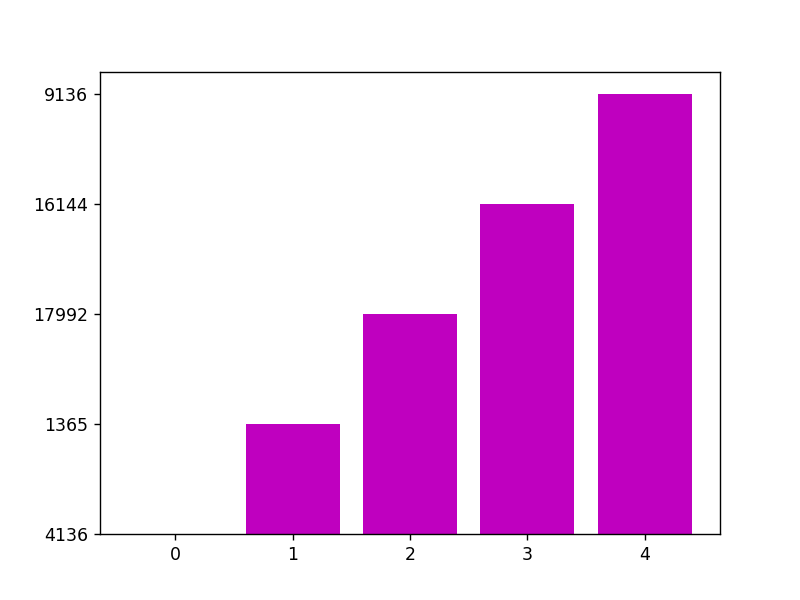

<BarContainer object of 5 artists>

In [43]:
plt.bar(x_axis, counts_per_region, color = 'm', align = 'center')

In [23]:
country_counts = clean_data['citizenship'].value_counts()
country_counts

PH         11365
unknown     9136
UA          7761
MD          5901
US          3636
KH          1979
ID          1971
BY          1463
MM          1250
RO           655
GH           544
KG           437
BG           342
HT           339
UZ           261
VN           170
GW           145
LA           126
CO           124
NG           108
AF            97
MG            94
LK            85
SL            81
UG            70
SN            70
TH            55
KZ            54
CD            53
ML            45
TJ            43
BF            33
KE            32
NE            31
CI            31
NP            27
TM            26
CN            23
AL            22
MX            19
BO            18
GN            15
ER            13
KR            12
BD            11
Name: citizenship, dtype: int64

In [14]:
from_loc = clean_data.loc[ : , 'citizenship']

In [21]:
from_loc.unique()

array(['CO', 'MD', 'RO', 'UA', 'BY', 'GH', 'AL', 'BG', 'UZ', 'ID', 'TJ',
       'CD', 'ML', 'GW', 'CI', 'SN', 'SL', 'KG', 'GN', 'KH', 'LA', 'KZ',
       'TM', 'BF', 'NE', 'HT', 'LK', 'BO', 'MM', 'AF', 'UG', 'ER', 'NG',
       'NP', 'PH', 'BD', 'unknown', 'US', 'TH', 'KR', 'VN', 'KE', 'CN',
       'MX', 'MG'], dtype=object)

In [19]:
citizen_df = pd.DataFrame({'country code' : ['CO', 'MD', 'RO', 'UA', 'BY', 'GH', 'AL', 'BG', 'UZ', 'ID', 'TJ',
       'CD', 'ML', 'GW', 'CI', 'SN', 'SL', 'KG', 'GN', 'KH', 'LA', 'KZ',
       'TM', 'BF', 'NE', 'HT', 'LK', 'BO', 'MM', 'AF', 'UG', 'ER', 'NG',
       'NP', 'PH', 'BD', 'unknown', 'US', 'TH', 'KR', 'VN', 'KE', 'CN',
       'MX', 'MG'], 'counts' : [11365,  9136,  7761,  5901,  3636,  1979,  1971,  1463,  1250,
         655,   544,   437,   342,   339,   261,   170,   145,   126,
         124,   108,    97,    94,    85,    81,    70,    55,    54,
          53,    45,    43,    33,    32,    31,    27,    26,    23,
          22,    19,    18,    15,    13,    12,    11]})

ValueError: arrays must all be same length

In [17]:
#x_axis = np.arrange(len(countries))
#plt.bar(x_axis, y_labels, color = 'm', align = 'center')